In [3]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# loading the data
inflation_rate = r"C:\Users\SamDutse\Desktop\Curent Work\dollar_inflation.csv"
data = pd.read_csv(inflation_rate)

In [5]:
#viewing the top five rows of the data
data.head()

,Year,Dollar Value,Buying Power,Inflation Rate
0,1800,1.00,1.00,2.44
1,1801,1.01,0.99,0.79
2,1802,0.85,1.18,-15.75
3,1803,0.90,1.11,5.61
4,1804,0.94,1.06,4.42


In [6]:
#viewing the last five rows of the data
data.tail()

,Year,Dollar Value,Buying Power,Inflation Rate
218,2018,19.94,0.05,2.49
219,2019,20.29,0.05,1.76
220,2020,20.54,0.05,1.23
221,2021,21.51,0.05,4.70
222,2022,23.56,0.04,#VALUE!


In [7]:
#viewing the dimension of the data
data.shape

(223, 4)

In [8]:
#getting info on the data columns, Non null value counts and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            223 non-null    int64  
 1   Dollar Value    223 non-null    float64
 2   Buying Power    223 non-null    float64
 3   Inflation Rate  223 non-null    object 
dtypes: float64(2), int64(1), object(1)
memory usage: 7.1+ KB


In [9]:
#data cleaning
#removing the year 2022 due to the #VALUE
data = data[data["Year"] != 2022]
data

,Year,Dollar Value,Buying Power,Inflation Rate
0,1800,1.00,1.00,2.44
1,1801,1.01,0.99,0.79
2,1802,0.85,1.18,-15.75
3,1803,0.90,1.11,5.61
4,1804,0.94,1.06,4.42
...,...,...,...,...
217,2017,19.45,0.05,2.13
218,2018,19.94,0.05,2.49
219,2019,20.29,0.05,1.76
220,2020,20.54,0.05,1.23


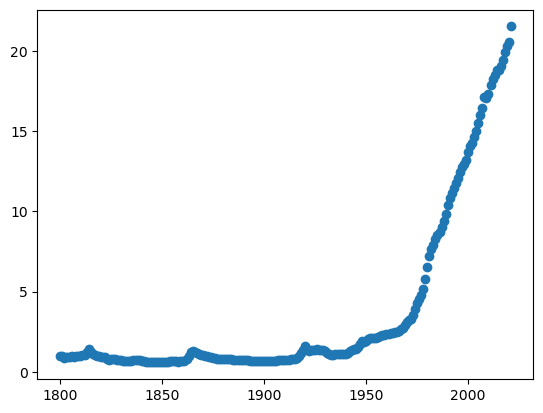

In [10]:
#data visualization
plt.scatter(x = data["Year"], y = data["Dollar Value"])

<AxesSubplot:>

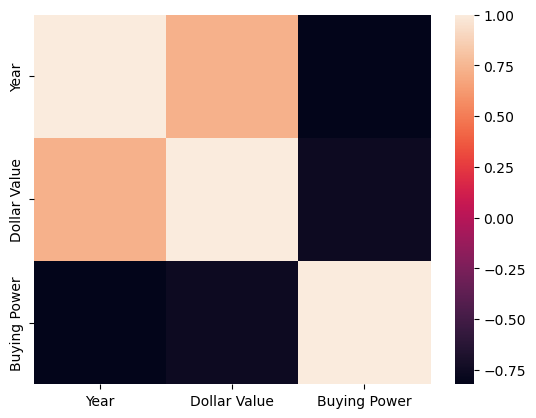

In [11]:
#Building the correlation matrix
sns.heatmap(data.corr())

In [12]:
# data splicing into independent and dependent variables
X = data.iloc[:, 0].values.reshape(-1, 1)
y = data.iloc[:, 1].values

In [13]:
#importing model and model selection
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [14]:
#splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 0)

In [15]:
#fitting multiple linear regression model to training set
Regressor = LinearRegression()
Regressor.fit(X_train, y_train)

LinearRegression()

In [17]:
#predicting the test set result
Prediction = Regressor.predict(X_test)
Prediction

array([ 4.93193616,  9.5339957 ,  7.45361262,  0.89725384,  8.14707364,
        5.62539719, -0.48966821,  1.21246339,  0.77117001, -2.75917702,
        1.96896633, -0.93096159, -2.94830276,  9.28182805,  0.7081281 ,
        7.20144497,  3.41893029,  9.59703761,  9.47095378,  2.3472178 ,
        3.60805603,  8.77749276,  4.5536847 ,  1.40158913,  1.52767295,
       -2.50700938,  6.63406777,  6.76015159,  4.49064278,  5.81452292,
        0.20379281,  4.42760087,  2.85155309,  3.29284647, -2.12875791,
       -2.31788364,  8.58836702, -2.82221894,  1.46463104,  6.88623542,
        2.78851118,  6.12973248,  2.41025971,  7.83186409,  5.75148101,
       -1.18312924,  6.50798395,  8.39924129,  9.21878614,  4.17543323,
        9.66007952,  8.52532511,  9.09270232, -2.25484173,  2.53634353,
        3.54501411,  5.49931337, -1.87659026,  9.40791187, -0.4266263 ,
        9.91224716, -3.01134467,  3.10372073,  4.04934941,  0.58204428,
        0.01466708, -1.62442262])

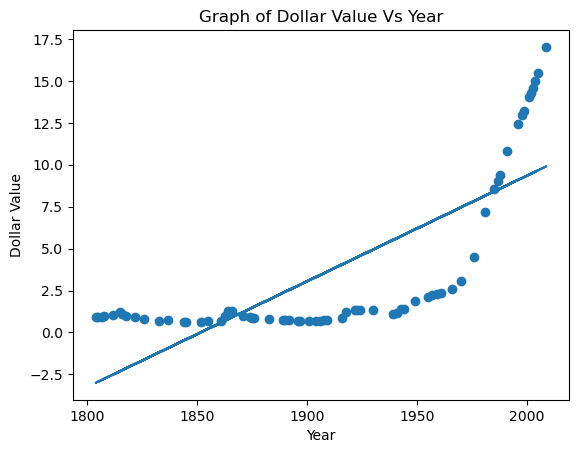

In [23]:
plt.scatter(X_test, y_test)
plt.plot(X_test, Prediction)
plt.xlabel("Year")
plt.ylabel("Dollar Value")

plt.title("Graph of Dollar Value Vs Year")
plt.show()

In [19]:
#calculating the coefficient and intercept
m = Regressor.coef_
m

array([0.06304191])

In [20]:
c = Regressor.intercept_
c

-116.73895280375025

In [21]:
#evaluating the model
from sklearn.metrics import r2_score
r2_score(y_test, Prediction) * 100

54.34015098914631

In [22]:
#building a predictor function
def Predictor(year):
    return m*year + c
print(Predictor(2022))
print(Predictor(2030))

[10.73179201]
[11.2361273]
